In [144]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# **Newton-Raphson method**
The Newton-Raphson method is a method of finding roots of a nonlinear function. Unlike the Bisection method, it falls under the category of **Open methods** due to the fact that we only need one initial guess that does not have to bracket the actual root.

In today's lab, we will be implementing the Newton-Raphson method in python. We will be considering the function $f(x)$ as an array of coefficients, for instance if we want to have $f(x) = x^3+x-2$, then in python we will create an array as follows:

In [2]:
f = [1,0,1,-2]

Note that your implementation should be able to handle the array `f` of any size, which means it should be able to find the root of any given polynomial. But for testing purposes, you can use the array `f` given here.

Next, you will need to create a user-defined function as follows
```
func(f, x)
```
This function will take the coefficent array `f` and a point `x` as input and evaluate the value of the function at that point x using a loop and return that value.

This function will be called in the other function that you will implement, which is as follows:
```
newtonraphson(f, x_init, epsilon)
```
This function will return the root of the equation represented by the array `f` and in case it does not reach the root exactly then it will return the close enough value to the root that has an absolute Relative Approximate Error $|\epsilon_a|$ of at most epsilon (%). Note that, here epsilon is the Relative Error Tolerance $\epsilon_s$.

You will also need a function to calculate the derivative $f'(x)$ at some value of $x$.
```
derivative(f, x)
```

## Task 1: The Function

In [23]:
# Write a function to return the value of the polynomial at the point x
def func(f, x):
    # Write your code here
    n = len(f)
    val = 0
    for i in range(n):
      val += f[n - i-1] * (x ** i)
    return val

In [24]:
print(func(f,2))
print(func(f,3))
print(func(f,5))

8
28
128


Sample Test Cases:
<br>
**Input**   $\quad$    **Output**
<br>
2$\quad\quad\quad$8
<br>
3$\quad\quad\quad$28
<br>
5$\quad\quad\quad$128

## Task 2: The Derivative of the Function

In [30]:
# Write a function for evaluating the derivative of the polynomial given by array f
def derivative(f, x):
    # Write your code here
    n = len(f)
    val = 0
    for i in range(n):
      val += f[i] * (n-i-1)* (x**(n-i-2))

    return val

In [31]:
print(derivative(f,2))
print(derivative(f,3))
print(derivative(f,5))

13.0
28.0
76.0


Sample Test Cases:
<br>
**Input**   $\quad$    **Output**
<br>
2$\quad\quad\quad$13
<br>
3$\quad\quad\quad$28
<br>
5$\quad\quad\quad$76

## Task 3: The Algorithm
Now, its time to implement the whole algorithm. Take the initial guess as $2$, the Relative Error Tolerance $\epsilon_s$ as $0.01$, and the maximum number of iterations as $10000$.

In [134]:
x_init = 2
epsilon = 0.01
MAX_ITERS=10000
iters = []
x = []
epsilons = []
# Complete the following function
def newtonraphson(f, x_init, epsilon):
    # Write your code here
    x_prev = x_init
    x_next = 0
    for i in range(MAX_ITERS):
      x_next = x_prev - (func(f, x_prev) / derivative(f, x_prev) )

      epsilons.append(abs((x_next - x_prev)/x_next))

      x_prev = x_next

      x.append(x_next)
      iters.append(i+1)

      if abs(func(f, x_next)) < epsilon:
        break

    return x_next

In [135]:
# Test your function here

print(newtonraphson(f, x_init, epsilon))
print(epsilons)
print(iters)
print(x)

1.0000170707310327
[0.4444444444444445, 0.2789886660854402, 0.07743560616431946, 0.004763198019567617]
[1, 2, 3, 4]
[1.3846153846153846, 1.0825861255309108, 1.0047803500618726, 1.0000170707310327]


The value should be very very close to $1$. (*e.g.* $1.0000170707310327$)<br>
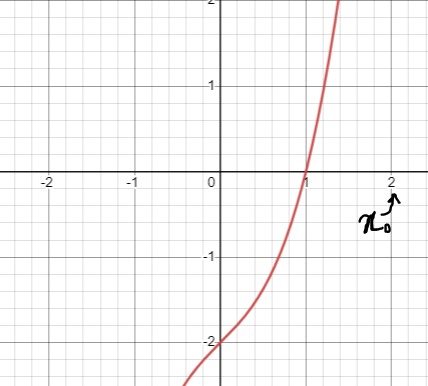

## Task 4: Plotting
In case you do not remember how graphs can be plotted in Python, here is a sample code showing how to do it using the `matplotlib` library.

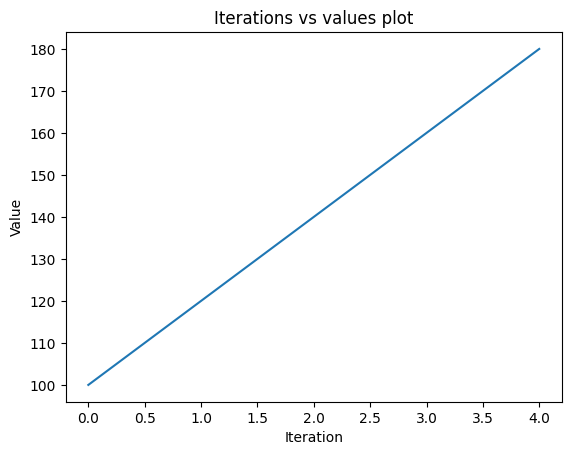

In [126]:
iters1 = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

plt.plot(iters1, vals)
plt.title("Iterations vs values plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Root Approximation $(x_i)$ along the $Y$-axis.

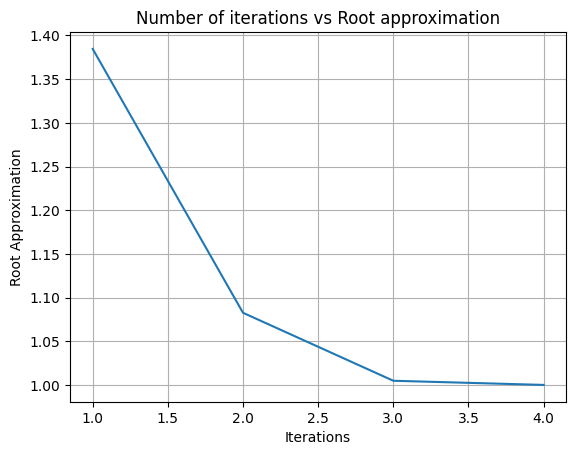

In [136]:

plt.plot(iters, x)
plt.title("Number of iterations vs Root approximation")
plt.xlabel("Iterations")
plt.ylabel("Root Approximation")
plt.grid()
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Relative Approximate Error $(\epsilon_a)$ along the $Y$-axis.

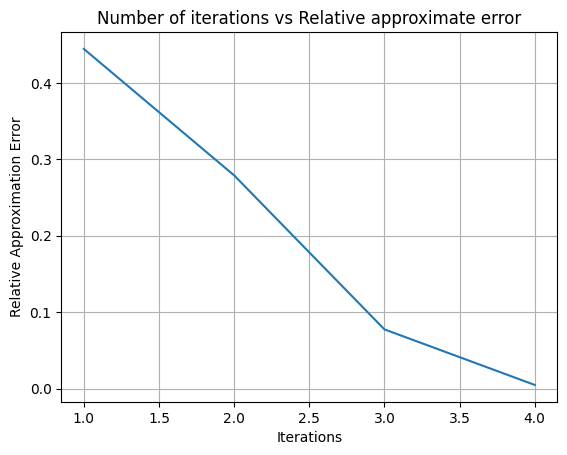

In [137]:

plt.plot(iters, epsilons)
plt.title("Number of iterations vs Relative approximate error")
plt.xlabel("Iterations")
plt.ylabel("Relative Approximation Error")
plt.grid()
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Number of Significant Digits that are at least correct $(m)$ along the $Y$-axis.

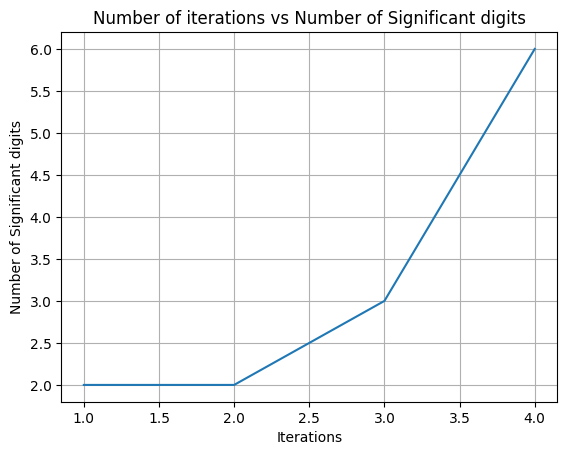

In [145]:
s = []
for ep in epsilons:
  m = math.floor(2 -  math.log(ep/0.5))
  s.append(m)

plt.plot(iters, s)
plt.title("Number of iterations vs Number of Significant digits")
plt.xlabel("Iterations")
plt.ylabel("Number of Significant digits")
plt.grid()
plt.show()